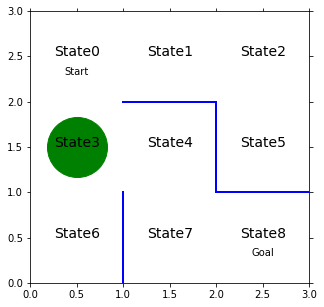

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

plt.plot([1, 1], [0, 1], color='blue', linewidth=2)
plt.plot([1, 2], [2, 2], color='blue', linewidth=2)
plt.plot([2, 2], [2, 1], color='blue', linewidth=2)
plt.plot([2, 3], [1, 1], color='blue', linewidth=2)

plt.text(0.5, 2.5, 'State0', size=14, ha='center')
plt.text(1.5, 2.5, 'State1', size=14, ha='center')
plt.text(2.5, 2.5, 'State2', size=14, ha='center')
plt.text(0.5, 1.5, 'State3', size=14, ha='center')
plt.text(1.5, 1.5, 'State4', size=14, ha='center')
plt.text(2.5, 1.5, 'State5', size=14, ha='center')
plt.text(0.5, 0.5, 'State6', size=14, ha='center')
plt.text(1.5, 0.5, 'State7', size=14, ha='center')
plt.text(2.5, 0.5, 'State8', size=14, ha='center')
plt.text(0.5, 2.3, 'Start', ha='center')
plt.text(2.5, 0.3, 'Goal', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

####################################
####################################
####################################

import numpy as np
import random as rm
import sys
import matplotlib.pyplot as plt

# The statespace
states = ["Chabudai","Husuma","TV"]

transitionName = [["CC","CT","CH"],["HH","HT","HC"],["TT","TH","TC"]]
transitionMatrix = [[0.2,0.5,0.3],[0.1,0.6,0.3],[0.5,0.5,0.0]]

alist = []

def generate_sequence(days, cPos):
    # Choose the starting state
    currentPosition = cPos
    alist.append(currentPosition)
    #print("Start state: " + currentPosition)
    # Shall store the sequence of states taken. So, this only has the starting state for now.
    activityList = [currentPosition]
    i = 0
    # To calculate the probability of the activityList
    prob = 1
    while i != days:
        if currentPosition == "Chabudai":
            change = np.random.choice(transitionName[0],replace=True,p=transitionMatrix[0])
            if change == "CC":
                prob = prob * 0.2
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "CT":
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "Husuma":
            change = np.random.choice(transitionName[1],replace=True,p=transitionMatrix[1])
            if change == "HC":
                prob = prob * 0.3
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "HT":
                prob = prob * 0.6
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
            else:
                prob = prob * 0.1
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
                
        elif currentPosition == "TV":
            change = np.random.choice(transitionName[2],replace=True,p=transitionMatrix[2])
            if change == "TC":
                prob = prob * 0.0
                activityList.append("Chabudai")
                alist.append("Chabudai")
                pass
            elif change == "TH":
                prob = prob * 0.3
                currentPosition = "Husuma"
                activityList.append("Husuma")
                alist.append("Husuma")
            else:
                prob = prob * 0.5
                currentPosition = "TV"
                activityList.append("TV")
                alist.append("TV")
        i += 1  


#args = sys.argv
startPosition="TV"

LENGTH = 121
counter = 0

TV_seq = []
Chabudai_seq = []
Husuma_seq = []

for i in range(1,LENGTH,2):
    LEN = i - 1
    alist = []
    
    generate_sequence(LEN, startPosition)

    counter = counter + 1
    
    if counter % 10 == 0:
        sum = alist.count('Chabudai') + alist.count('Husuma') + alist.count('TV') 
        Chabudai_seq.append((alist.count('Chabudai'))/sum*100)
        Husuma_seq.append((alist.count('Husuma'))/sum*100)
        TV_seq.append((alist.count('TV'))/sum*100)
    
    rstring = '' 
    for i in alist:
        rstring = rstring + i[0]
    #print(rstring)

    
#print(alist)    

#print(Chabudai_seq)
#print(Husuma_seq)
#print(TV_seq)

state_history = []

for i in alist:
    if i == "TV":
        state_history.append(8)
    if i == "Husuma":
        state_history.append(1)
    if i == "Chabudai":
        state_history.append(3)

####################################
####################################
####################################

from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line,)


def animate(i):
    state = state_history[i]  
    x = (state % 3) + 0.5  
    y = 2.5 - int(state / 3) 
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())